<a href="https://colab.research.google.com/github/eriksali/Text-Analytics_LDA/blob/master/lda_doc_topic_not_single_word.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib
import time

# Importing Gensim
import gensim
from gensim import corpora

from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)


Saving utils.py to utils.py


5237

In [ ]:


from utils import load_data
from utils import preprocess_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [74]:
import os
import pandas as pd

#dirpath = '/content/drive/MyDrive/lda_silhouette/Names_no_duplicates/'
dirpath = '/content/drive/MyDrive/Names/'
output = '/content/drive/MyDrive/name.csv'
csvout_lst = []
files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

for filename in sorted(files):
    data = pd.read_csv(filename, index_col=0, header=None)
    csvout_lst.append(data)
#csvout_lst.index
#print(csvout_lst)
#print (np.arange(len(csvout_lst.index)))
pd.concat(csvout_lst).to_csv(output, index=True)

In [75]:
from pandas import read_csv
df = read_csv('/content/drive/MyDrive/name.csv')
corpus = df.values
print(corpus)

[['rmse correct pred torch tensor repeat targ torch tensor repeat loss equal pred targ']
 ['diagon add scalar torch randn plu diag diagon add scalar diag torch eye len torch allclos plu diag diag']
 ['creat token first first tri creat dataset default creator dataset get notifi tri explicitli set notifi true tri explicitli set notifi fals token version activ applic json email address baz gmail com data creat dataset version applic json notifi dataset version applic json notifi dataset version applic json creat dataset notifi respons client post revers kwarg json dump content type token respons json respons client post revers kwarg json dump content type dataset respons json equal respons statu code dataset object get respons json true notifi respons client put revers kwarg dataset json dump content type equal respons statu code equal respons json dataset refresh true notifi respons client put revers kwarg dataset json dump content type equal respons statu code equal respons json dataset

In [76]:
corpus.shape

(1999, 1)

In [77]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(corpus)

print(dict_)

Dictionary(1990 unique tokens: ['rmse correct pred torch tensor repeat targ torch tensor repeat loss equal pred targ', 'diagon add scalar torch randn plu diag diagon add scalar diag torch eye len torch allclos plu diag diag', 'creat token first first tri creat dataset default creator dataset get notifi tri explicitli set notifi true tri explicitli set notifi fals token version activ applic json email address baz gmail com data creat dataset version applic json notifi dataset version applic json notifi dataset version applic json creat dataset notifi respons client post revers kwarg json dump content type token respons json respons client post revers kwarg json dump content type dataset respons json equal respons statu code dataset object get respons json true notifi respons client put revers kwarg dataset json dump content type equal respons statu code equal respons json dataset refresh true notifi respons client put revers kwarg dataset json dump content type equal respons statu code 

In [78]:
for i in dict_.values():
    print(i)

rmse correct pred torch tensor repeat targ torch tensor repeat loss equal pred targ
diagon add scalar torch randn plu diag diagon add scalar diag torch eye len torch allclos plu diag diag
creat token first first tri creat dataset default creator dataset get notifi tri explicitli set notifi true tri explicitli set notifi fals token version activ applic json email address baz gmail com data creat dataset version applic json notifi dataset version applic json notifi dataset version applic json creat dataset notifi respons client post revers kwarg json dump content type token respons json respons client post revers kwarg json dump content type dataset respons json equal respons statu code dataset object get respons json true notifi respons client put revers kwarg dataset json dump content type equal respons statu code equal respons json dataset refresh true notifi respons client put revers kwarg dataset json dump content type equal respons statu code equal respons json dataset refresh fals

In [79]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in corpus]
doc_term_matrix

[[(0, 1)],
 [(1, 1)],
 [(2, 1)],
 [(3, 1)],
 [(4, 1)],
 [(5, 1)],
 [(6, 1)],
 [(7, 1)],
 [(8, 1)],
 [(9, 1)],
 [(10, 1)],
 [(11, 1)],
 [(12, 1)],
 [(13, 1)],
 [(14, 1)],
 [(15, 1)],
 [(16, 1)],
 [(17, 1)],
 [(18, 1)],
 [(19, 1)],
 [(20, 1)],
 [(20, 1)],
 [(21, 1)],
 [(22, 1)],
 [(23, 1)],
 [(24, 1)],
 [(25, 1)],
 [(26, 1)],
 [(27, 1)],
 [(28, 1)],
 [(29, 1)],
 [(30, 1)],
 [(31, 1)],
 [(32, 1)],
 [(33, 1)],
 [(34, 1)],
 [(35, 1)],
 [(36, 1)],
 [(37, 1)],
 [(38, 1)],
 [(39, 1)],
 [(39, 1)],
 [(40, 1)],
 [(41, 1)],
 [(42, 1)],
 [(43, 1)],
 [(44, 1)],
 [(45, 1)],
 [(46, 1)],
 [(47, 1)],
 [(48, 1)],
 [(49, 1)],
 [(50, 1)],
 [(51, 1)],
 [(52, 1)],
 [(53, 1)],
 [(54, 1)],
 [(55, 1)],
 [(56, 1)],
 [(57, 1)],
 [(58, 1)],
 [(59, 1)],
 [(60, 1)],
 [(61, 1)],
 [(62, 1)],
 [(63, 1)],
 [(64, 1)],
 [(65, 1)],
 [(66, 1)],
 [(67, 1)],
 [(68, 1)],
 [(69, 1)],
 [(70, 1)],
 [(71, 1)],
 [(72, 1)],
 [(73, 1)],
 [(74, 1)],
 [(75, 1)],
 [(76, 1)],
 [(77, 1)],
 [(78, 1)],
 [(79, 1)],
 [(80, 1)],
 [(81, 1)],
 [

In [80]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [81]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=5, alpha=0.1, eta=0.0001, random_state=30, eval_every=None)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [82]:
# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics(num_topics=10)

# we need to manually check whethere the topics are different from one another or not

[(0,
  '0.005*"byte bytearray string utf normal string byte byte obj true byte like byte obj instanc byte byte obj byte bytearray obj bytearray true byte like bytearray obj instanc byte bytearray obj byte string obj fals byte like string obj rais runtim error byte string obj" + 0.005*"user except band user except band band param band error pipelin task band except pytest rais build error exc info band error logger error exc info valu str exc info valu" + 0.005*"specifi expect shape dataset specif return valid tensor shape label label dataset spec split batch size dataset builder dataset class split split shuffl buffer size dataset dataset builder load batch size batch size dataset spec data dataset spec valu dataset element spec max len dataset builder name max len dataset builder name spec tensor spec batch size max len max len dtype int32 label spec tensor spec batch size max len dtype int32 equal dataset spec shape spec shape equal dataset spec dtype spec dtype equal dataset spec sh

In [ ]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(9, '0.005*"gener random data predict without fit random normal size rais fit error gaussian cluster min compon predict" + 0.005*"mani lap complet date extract question question token token token question file tabl question context tabl question context read file file question token number entiti tabl question context get entiti question number entiti" + 0.005*"coverag semant parser experi json model train save load ensur model train save load" + 0.005*"model preserv token loss forward loss backward loss embed token embed mask batch weight embed loss forward loss backward loss forward pass run correctli train tensor dataset tensor dict result model train tensor set result embed result tupl embed shape expect embed shape loss result item forward loss result item backward loss result item almost equal loss forward loss backward loss decim" + 0.005*"sympi physic quantum cartesian sympi physic quantum cartesian arg"'), (8, '0.005*"given valid credenti run integr modul use valid credenti e

In [ ]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

doc :  0 [(0, 0.049999993), (1, 0.049999993), (2, 0.049999993), (3, 0.049999993), (4, 0.049999993), (5, 0.55), (6, 0.049999993), (7, 0.049999993), (8, 0.049999993), (9, 0.049999993)]
doc :  1 [(0, 0.55), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05)]
doc :  2 [(0, 0.049999993), (1, 0.049999993), (2, 0.049999993), (3, 0.049999993), (4, 0.049999993), (5, 0.049999993), (6, 0.049999993), (7, 0.55), (8, 0.049999993), (9, 0.049999993)]
doc :  3 [(0, 0.05), (1, 0.55), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05)]
doc :  4 [(0, 0.05), (1, 0.55), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 0.05), (8, 0.05), (9, 0.05)]
doc :  5 [(0, 0.049999993), (1, 0.049999993), (2, 0.049999993), (3, 0.049999993), (4, 0.049999993), (5, 0.049999993), (6, 0.049999993), (7, 0.049999993), (8, 0.049999993), (9, 0.55)]
doc :  6 [(0, 0.55), (1, 0.05), (2, 0.05), (3, 0.05), (4, 0.05), (5, 0.05), (6, 0.05), (7, 

In [ ]:
# saving the topic associations with the documents to .csv
import csv

header = ['NameOfDoc', 'WeightPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/weight_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [ ]:
documents = corpus.tolist()

In [ ]:
print(documents[5])

['exampl txt read exampl list exampl list data exampl list path path join get temp dir gfile open exampl list path write exampl list data exampl dataset util read exampl list exampl list path list equal exampl']


In [ ]:
start = time.time()
preprocessed_documents = [" ".join(s) for s in documents]
print(f"Preprocessing time: {time.time()-start:.1f}s.")

Preprocessing time: 0.0s.


In [ ]:
import nltk
nltk.download('stopwords')
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, stop_words=stopwords.words('english')+['like', 'said', 'could', 'would', 'one', 'know', 'us'], max_features=1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tf = tf_vectorizer.fit_transform(preprocessed_documents).toarray()


In [ ]:
features = tf_vectorizer.get_feature_names_out()

In [ ]:
tf.shape

(1999, 785)

In [ ]:
len(features)

785

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
from utils import print_topics, get_topics_top_words
n_topics = 5
# alpha = 1 / n_components, beta = 1 / n_components
model = LDA(n_components=n_topics, random_state=0)
# calculate document-to-topic matrix
doc_topic = model.fit_transform(tf)

In [ ]:
from sklearn.cluster import KMeans

C = 5
random_state = 42
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

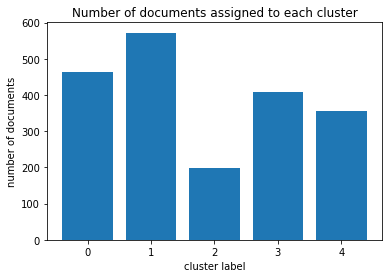

In [ ]:
x, y = np.unique(cluster_labels, return_counts=True)
plt.bar(x, y)
plt.xticks(range(C), range(C))
plt.title("Number of documents assigned to each cluster")
plt.xlabel("cluster label")
plt.ylabel("number of documents")
plt.show()

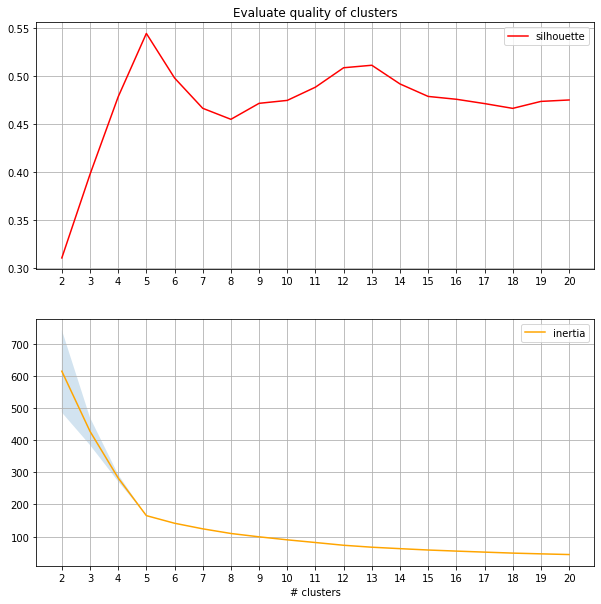

In [ ]:
from sklearn import metrics

def plot_cluster_metrics(data, min_clusters=2, max_clusters=20, iters=10):
    n_clusters = []

    wgss_mean = [] # within group sum of squares, or inertia
    wgss_var = [] # variance of results because it's stochastic

    silhouette_mean = []
    silhouette_var = []
    
    for n in range(min_clusters, max_clusters+1):
        n_clusters.append(n)

        wgss_iters = []
        silhouette_iters = []

        for i in range(iters):
            clusterer = KMeans(n_clusters=n).fit(data)
            wgss_iters.append(clusterer.inertia_)
            silhouette_iters.append(metrics.silhouette_score(data,
                                                             clusterer.labels_,
                                                             metric='euclidean'))

        wgss_mean.append(np.array(wgss_iters).mean())
        wgss_var.append(np.array(wgss_iters).var())

        silhouette_mean.append(np.array(silhouette_iters).mean())
        silhouette_var.append(np.array(silhouette_iters).var())

    wgss_mean = np.array(wgss_mean)
    wgss_var = np.array(wgss_var)

    silhouette_mean = np.array(silhouette_mean)
    silhouette_var = np.array(silhouette_var)
    
    # plot every metric
    plt.figure(figsize=(10, 10))
    
    plt.subplot(211)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, silhouette_mean, alpha=1, color='red', label='silhouette')
    plt.fill_between(n_clusters,
                     silhouette_mean-silhouette_var,
                     silhouette_mean+silhouette_var,
                     alpha=0.2)
    plt.title("Evaluate quality of clusters")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(212)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, wgss_mean, alpha=1, label='inertia', color='orange')
    plt.fill_between(n_clusters, wgss_mean-wgss_var, wgss_mean+wgss_var, alpha=0.2)
    plt.xlabel("# clusters")
    plt.legend()
    plt.grid(True)
    
    #plt.savefig("part-2-images/clustering-metrics.jpg", dpi=100)
    plt.show()
    return
plot_cluster_metrics(doc_topic)

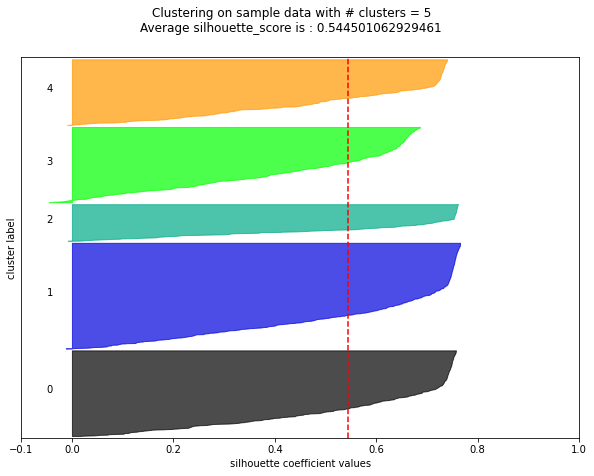

In [ ]:
# adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_
# silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def plot_cluster_silhouette(data, n_clusters, cluster_labels):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Clustering on sample data with # clusters = "
                  + str(n_clusters) + "\nAverage silhouette_score is : "
                  + str(silhouette_avg)))
    
    #plt.savefig("part-2-images/clustering-silhouette.jpg", dpi=100)
    plt.show()
C = n_topics
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

plot_cluster_silhouette(doc_topic, C, cluster_labels)